In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vietnew-csv/vietnew_dataset/val_tokenized
/kaggle/input/vietnew-csv/vietnew_dataset/train_tokenized
/kaggle/input/vietnew-csv/vietnew_dataset/test_tokenized


In [2]:
train_df = pd.read_csv('/kaggle/input/vietnew-csv/vietnew_dataset/train_tokenized',index_col=[0])
test_df = pd.read_csv('/kaggle/input/vietnew-csv/vietnew_dataset/test_tokenized',index_col=[0])
val_df = pd.read_csv('/kaggle/input/vietnew-csv/vietnew_dataset/val_tokenized',index_col=[0])

In [3]:
train_df

,source_text,target_text
0,"Dân_thường ở Damascus , Syria chạy loạn . Bình...",Triều_Tiên bác bỏ cáo_buộc nước này bán các lo...
1,"Theo đó , khoảng 10h ngày 30/6 , ngọn lửa bắt_...","Đám cháy bùng_phát ở khu_vực rừng thông , do t..."
2,"Theo Daily_Star , máy_bay MH370 mất_tích 4 năm...",Giả_thiết MH370 rơi ở rừng Campuchia tiếp_tục ...
3,Món đồ_chơi tình_dục bị nghi là bom . Chuyến b...,Chuyến bay của hãng AirAsia khởi_hành từ sân_b...
4,""" 8 người bị vùi lấp trong đống đổ_nát , lực_l...",Giàn_giáo công_trình cây_xăng tại xã Bắc_Sơn (...
...,...,...
105413,"Lệnh ngừng_bắn đổ_vỡ Sau 9 năm , cuộc_chiến Sy...",Để chiều lòng quân_đội Syria trong việc chiếm ...
105414,"Theo tờ_báo trên , bà Ko_Yong_Suk ( 60 tuổi ) ...",Tờ The_Washington_Post ngày 27/5 đưa tin cho b...
105415,"CNN đưa tin EU , Mexico và Canada đã lập_tức c...",Cuộc_chiến thương_mại đã thực_sự bắt_đầu khi L...
105416,Chiếc xe_khách chạy lúc nửa_đêm nhồi quá 30 ng...,"Chở quá 30 người so với quy_định , xe_khách Đứ..."


In [4]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()
val_df = val_df.drop_duplicates()

In [5]:
analy_train = train_df.copy()
print('Number of duplicate entries: ', analy_train.duplicated().sum())

Number of duplicate entries:  0


In [6]:
analy_train['Number_of_words'] = analy_train.source_text.apply(lambda x: len(x.split()))
analy_train['Number_of_words_target'] = analy_train.target_text.apply(lambda x: len(x.split()))

In [7]:
mx = max(analy_train['Number_of_words_target'])
mn = min(analy_train['Number_of_words_target'])
mxs = max(analy_train['Number_of_words'])
mns = min(analy_train['Number_of_words'])
print(f'Max:min words in source_text: {mxs}:{mns}')
print(f'Max:min words in target_text: {mx}:{mn}')

Max:min words in source_text: 2121:26
Max:min words in target_text: 123:7


<AxesSubplot:ylabel='Count'>

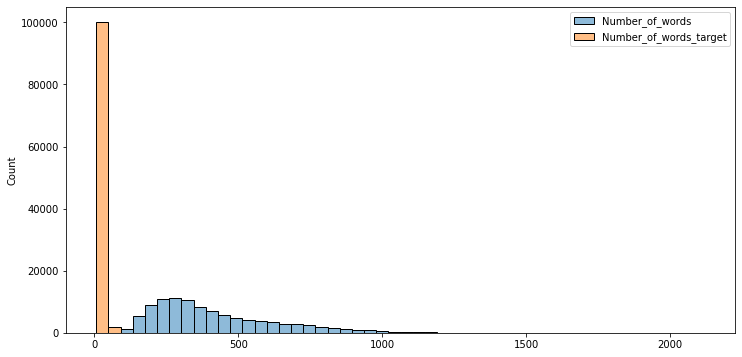

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
sns.histplot([analy_train['Number_of_words'], analy_train['Number_of_words_target']], bins=50)

In [9]:
!pip install --upgrade simplet5

  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 KB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 KB 44.8 MB/s eta 0:00:00
  Created wheel for simplet5: filename=simplet5-0.1.4-py3-none-any.whl size=6873 sha256=ad276f3c9a7f0617aa128b548ad3a65fc5245ce943bb3f52ef659dcf9023a36f
  Stored in directory: /root/.cache/pip/wheels/30/1b/96/47ad5fda68def6635961fd0ca312fc0ce3670936ae09d97c43
Successfully built simplet5
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
  Attempting uninstall: pyDeprecate
    Found existing installation: pyDeprecate 0.3.2
    Uninstalling pyDeprecate-0.3.2:
      Successfully uninstalled pyDeprecate-0.3.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4

In [10]:
from simplet5 import SimpleT5
from transformers import T5ForConditionalGeneration, T5Tokenizer
model_name = 'NlpHUST/t5-small-vi-summarization'
model = SimpleT5()
model.from_pretrained(model_type="t5", model_name=model_name)

Downloading:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.11M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/98.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [11]:
model.train(train_df=train_df, # pandas dataframe with 2 columns: source_text & target_text
            eval_df=val_df, # pandas dataframe with 2 columns: source_text & target_text
            source_max_token_len = 512, 
            target_max_token_len = 100,
            batch_size = 8,
            max_epochs = 8,
            use_gpu = True,
            early_stopping_patience_epochs = 0,
            )

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [12]:
!ls outputs/

simplet5-epoch-0-train-loss-1.6075-val-loss-1.3662
simplet5-epoch-1-train-loss-1.4529-val-loss-1.307
simplet5-epoch-2-train-loss-1.3839-val-loss-1.2644
simplet5-epoch-3-train-loss-1.3366-val-loss-1.2371
simplet5-epoch-4-train-loss-1.2999-val-loss-1.2129
simplet5-epoch-5-train-loss-1.2696-val-loss-1.1941
simplet5-epoch-6-train-loss-1.2434-val-loss-1.1818
simplet5-epoch-7-train-loss-1.2205-val-loss-1.167


In [13]:
# # load trained T5 model
# model.load_model("t5","outputs/simplet5-epoch-4-train-loss-1.2644-val-loss-1.1957", use_gpu=True)
# sumarize = test_df['target_text'].iloc[0]
# # predict
# model.predict(sumarize)

In [14]:
# sample_abstracts = test_df.sample(5)

# for i, abstract in sample_abstracts.iterrows():
#     print(f"===== Abstract =====")
#     print(abstract['source_text'])
#     summary= model.predict(abstract['source_text'])[0]
#     print(f"\n===== Actual Title =====")
#     print(f"{abstract['target_text']}")
#     print(f"\n===== Generated Title =====")
#     print(f"{summary}")
#     print("\n +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")

In [15]:
# !pip install rouge

In [16]:
# test_df['summarize_text']= test_df.source_text.apply(lambda x: model.predict(x))
# test_df.to_csv('metrics.csv', index=False)

In [17]:
# from rouge import Rouge 
# metric = pd.read_csv('metrics.csv')
# rouge = Rouge()
# scores = rouge.get_scores(metric['target_text'], metric['summarize_text'],avg=True)
# print(scores)